# Exercise 2

### Some theory

As we know that the data is of a binary nature, we are gonna model the data using a binomial model. 
Using the knowledge of conjugacy, we know that using a beta prior distribution the posterior distribution will also take the form of a beta distribution.

thus the prior will be of the form:

$p(\pi) \propto \pi^{\alpha -1}(1-\pi)^{\beta -1} = Beta(\alpha, \beta)$, where in this assignment $\alpha = 2$ and $\beta = 10$

The Likelihood is of the form:

$p(y|\pi) \propto \pi^y(1-\pi)^{n-y} = Beta(y+1,n-y+1)$, where in this assignment $y=44$ and  $n = 274$

and our posterior will then have the form (as on page 35 in the book):

$p(\pi|y) \propto \pi^{\alpha + y-1}(1-\pi)^{\beta + n - y-1} = Beta(\alpha + y, \beta + n - y)$

## Code base

In [10]:
%matplotlib inline

In [91]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt

In [12]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import utilities_and_data.plot_tools as plot_tools

In [13]:
content = np.loadtxt('data/algae.txt', dtype='int8')

In [14]:
y = sum(content)
n = len(content)
a = 2
b = 10

In [113]:
# freezing the distributions
likelihood = beta(y+1,n-y+1)
prior = beta(a,b)
posterior = beta(a+y,b+n-y)

## 2.a

In [21]:
pi_mean, pi_var = posterior.stats()

Beta(2,10) prior -> Posterior is Beta(46,240)

Mean of the posterior distribution = 0.1608
Variance of the posterior distribution = 0.00047


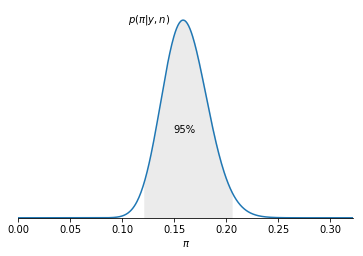

In [114]:
# x axis
x = np.linspace(0,pi_mean*2,500)
pos_pd = posterior.pdf(x)
pri_pd = prior.pdf(x)
lik_pd = likelihood.pdf(x)

print('Beta(2,10) prior -> Posterior is Beta(' + str(a+y) + ',' + str(b+n-y) + ')' +
      '\n\nMean of the posterior distribution = ' + str(np.round(pi_mean, decimals=4)) +
      '\nVariance of the posterior distribution = ' + str(np.round(pi_var, decimals=6)))
fig = plt.plot(x,pos_pd)
#plt.hold(True)
#plt.plot(x,pri_pd, 'k')
#plt.plot(x,lik_pd)

# show only x-axis
plot_tools.modify_axes.only_x()

# annotate the line
plt.annotate(
    r'$p(\pi|y,n)$',
    (x[len(x)//2] - 0.015, pos_pd[len(x)//2]),
    ha='right'  # horizontalalignment
)
pos_ppf025 = posterior.ppf(0.025)
pos_ppf975 = posterior.ppf(0.975)
x_95_idx = ((x > pos_ppf025) & (x < pos_ppf975))
# shade the 95% central posterior interval
plt.fill_between(x[x_95_idx], pos_pd[x_95_idx], color='0.92')
# add text into the shaded area
plt.text(posterior.median(), 8, "95%", horizontalalignment='center')
# add labels and title
plt.xlabel(r'$\pi$')

# scale x-axis tightly to the data.
plt.autoscale(axis='x', tight=True);

### Results
The average of $\pi$ (probability of a lake having detectable blue-green algae) under our prior beliefs is 16.1% with a variance of 0.00047

This means that we can be 95% certain that the real value of $\pi$ is with in 12.1% and 20.5%

## 2.b

To get the likelihood of $\pi_0$ being below 0.2 you can evaluate the Cumulative distribution function at $\pi_0$

In [102]:
posterior.cdf(0.20)

0.95861358719485545

## 2.c

The assumptions that are required is that all data are from a sequence of n exchangeable trials or drawn from a large population there each draw gives rise to one of two possible outcomes

## 2.d

In [121]:
# calculate densities
pdu = beta.pdf(x, y+1, n-y+1)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([prior.stats(moments='m') * (2*10**i) for i in range(3)])
bp = np.array([(1-prior.stats(moments='m')) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = y + ap
bi = n-y + bp
# calculate prior and posterior densities
pdp = beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

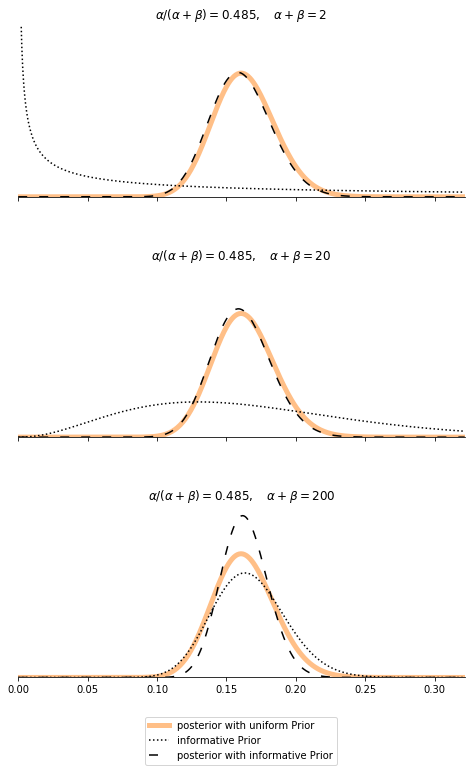

In [122]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color=plot_tools.lighten('C1'), linewidth=5)
    cPrior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,25))
# add legend to the last subplot
axes[-1].legend(
    (post1, cPrior, post2),
    ( 'posterior with uniform Prior',
      'informative Prior',
      'posterior with informative Prior'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);

It can be seen from the plot that the prior has little effect on the posterior distribution as the data set is sufficiently large and the model there for are largely driven by the posterior distribution.